In [1]:

#### Importing Libraries ####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline

In [2]:
### Data Preprocessing ###

dataset = pd.read_csv('financial_data.csv')

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
# Feature Engineering

dataset = dataset.drop(columns = ['months_employed'])
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()



,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [5]:
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

In [6]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


In [7]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)
dataset.columns



Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [8]:
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

In [9]:
dataset.head()

,entry_id,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
0,7629673,40,1,3135,3,3,1,550,36200,0.737398,...,0.487712,0.515977,0.580918,0.380918,10,1,30,1,0,0
1,3560428,61,0,3180,6,3,1,600,30150,0.738510,...,0.713423,0.826402,0.730720,0.630720,9,0,86,0,0,1
2,6934997,23,0,1540,0,0,1,450,34550,0.642993,...,0.595018,0.762284,0.531712,0.531712,7,0,19,0,0,1
3,5682812,40,0,5230,6,1,1,700,42150,0.665224,...,0.767828,0.778831,0.792552,0.592552,8,1,86,1,0,0
4,5335819,33,0,3590,5,2,1,1100,53850,0.617361,...,0.613487,0.665523,0.744634,0.744634,12,0,98,0,0,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                   17908 non-null int64
age                        17908 non-null int64
home_owner                 17908 non-null int64
income                     17908 non-null int64
years_employed             17908 non-null int64
current_address_year       17908 non-null int64
has_debt                   17908 non-null int64
amount_requested           17908 non-null int64
risk_score                 17908 non-null int64
risk_score_2               17908 non-null float64
risk_score_3               17908 non-null float64
risk_score_4               17908 non-null float64
risk_score_5               17908 non-null float64
ext_quality_score          17908 non-null float64
ext_quality_score_2        17908 non-null float64
inquiries_last_month       17908 non-null int64
e_signed                   17908 non-null int64
personal_account_months    17908 non-null int64
pay_schedule_bi

In [11]:
# Removing extra columns
response = dataset["e_signed"]
users = dataset['entry_id']
dataset = dataset.drop(columns = ["e_signed", "entry_id"])



In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 19 columns):
age                        17908 non-null int64
home_owner                 17908 non-null int64
income                     17908 non-null int64
years_employed             17908 non-null int64
current_address_year       17908 non-null int64
has_debt                   17908 non-null int64
amount_requested           17908 non-null int64
risk_score                 17908 non-null int64
risk_score_2               17908 non-null float64
risk_score_3               17908 non-null float64
risk_score_4               17908 non-null float64
risk_score_5               17908 non-null float64
ext_quality_score          17908 non-null float64
ext_quality_score_2        17908 non-null float64
inquiries_last_month       17908 non-null int64
personal_account_months    17908 non-null int64
pay_schedule_bi-weekly     17908 non-null uint8
pay_schedule_monthly       17908 non-null uint8
pay_schedule_we

In [12]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

E:\PYTHONANACONDA\envs\py37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\PYTHONANACONDA\envs\py37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
E:\PYTHONANACONDA\envs\py37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [14]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

Using TensorFlow backend.


In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 19))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
14326/14326 [==============================] - 4s 309us/step - loss: 0.6776 - acc: 0.5694
Epoch 2/100
14326/14326 [==============================] - 3s 204us/step - loss: 0.6696 - acc: 0.5865
Epoch 3/100
14326/14326 [==============================] - 3s 182us/step - loss: 0.6670 - acc: 0.5876
Epoch 4/100
14326/14326 [==============================] - 3s 232us/step - loss: 0.6641 - acc: 0.5934
Epoch 5/100
14326/14326 [==============================] - 3s 203us/step - loss: 0.6616 - acc: 0.5987
Epoch 6/100
14326/14326 [==============================] - 4s 255us/step - loss: 0.6571 - acc: 0.6057
Epoch 7/100
14326/14326 [==============================] - 3s 197us/step - loss: 0.6526 - acc: 0.6122
Epoch 8/100
14326/14326 [==============================] - 2s 152us/step - loss: 0.6492 - acc: 0.6184
Epoch 9/100
14326/14326 [==============================] - 4s 257us/step - loss: 0.6468 - acc: 0.6206 0s - loss
Epoch 10/100
14326/14326 [==============================] - 3s 240us/ste

14326/14326 [==============================] - 1s 91us/step - loss: 0.6213 - acc: 0.6388
Epoch 81/100
14326/14326 [==============================] - 1s 92us/step - loss: 0.6216 - acc: 0.6427
Epoch 82/100
14326/14326 [==============================] - 1s 92us/step - loss: 0.6211 - acc: 0.6437
Epoch 83/100
14326/14326 [==============================] - 1s 89us/step - loss: 0.6219 - acc: 0.6397
Epoch 84/100
14326/14326 [==============================] - 1s 90us/step - loss: 0.6215 - acc: 0.6402
Epoch 85/100
14326/14326 [==============================] - 1s 90us/step - loss: 0.6212 - acc: 0.6403
Epoch 86/100
14326/14326 [==============================] - 1s 90us/step - loss: 0.6209 - acc: 0.6429
Epoch 87/100
14326/14326 [==============================] - 1s 95us/step - loss: 0.6208 - acc: 0.6416
Epoch 88/100
14326/14326 [==============================] - 1s 93us/step - loss: 0.6212 - acc: 0.6434
Epoch 89/100
14326/14326 [==============================] - 1s 102us/step - loss: 0.6212 - acc:

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Test Data Accuracy: 0.6159


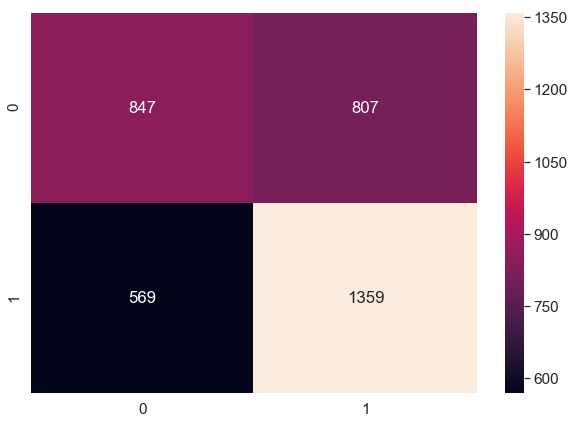

In [23]:
## EXTRA: Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [24]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55      1654
           1       0.63      0.70      0.66      1928

   micro avg       0.62      0.62      0.62      3582
   macro avg       0.61      0.61      0.61      3582
weighted avg       0.61      0.62      0.61      3582



In [25]:
# Formatting Final Results

final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]


In [26]:
final_results.head()

,entry_id,e_signed,predictions
8,6493191,1.0,False
9,8908605,1.0,True
12,6889184,1.0,True
16,9375601,0.0,True
18,8515555,1.0,True
